In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
!ls

'01_L (10) (1).bmp'  '01_L (2) (2).bmp'  '01_L (5) (1).bmp'  '01_L (8) (1).bmp'
'01_L (10).bmp'      '01_L (2).bmp'	 '01_L (5).bmp'      '01_L (8).bmp'
'01_L (1) (1).bmp'   '01_L (3) (1).bmp'  '01_L (6) (1).bmp'  '01_L (9) (1).bmp'
'01_L (1) (2).bmp'   '01_L (3).bmp'	 '01_L (6).bmp'      '01_L (9).bmp'
'01_L (1).bmp'	     '01_L (4) (1).bmp'  '01_L (7) (1).bmp'   sample_data
'01_L (2) (1).bmp'   '01_L (4).bmp'	 '01_L (7).bmp'


In [0]:
def load_all_images():
  
  images = []
  
  for i in range(1,10):
    
    curr_image = cv2.imread('01_L ('+str(i)+').bmp', cv2.IMREAD_GRAYSCALE)
    
    images.append(curr_image)
  
  return images

In [0]:
images = load_all_images()
morphKernel = np.ones((7, 7), np.uint8)
pupils = []
irises= []
final = []

In [6]:
for i in images : 
  
  img = i
  
  target = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)

  temp = target.copy()
	  
  target2 = target.copy()
	  
  ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
	  
  morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, morphKernel)
	  
  _, contours, hierarchy = cv2.findContours(morph.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)    
    
  cv2.drawContours(temp, contours, -1, (0, 0, 255), 3)     
	  
  (x, y), radius = cv2.minEnclosingCircle(contours[0])
  
  centre = (int(x), int(y))
	  
  radius = int(radius)
	  
  cv2.circle(target, centre, radius, (255, 0, 0), 2)
	  
  pupils.append(target)
	  
  temp = cv2.medianBlur(img.copy(), 5)
	  
  temp = cv2.equalizeHist(temp)
	  
  circles = cv2.HoughCircles(temp, cv2.HOUGH_GRADIENT, 1, 200, param1=140, param2=20, minRadius=80, maxRadius=130)

  circles = np.uint16(np.around(circles))
	  
  print(circles)
  
  for i in circles[0, :] :		
       
      cv2.circle(target2, (i[0], i[1]), i[2], (0, 255, 0), 2)
	  
      irises.append(target2)


[[[106 108 111]]]
[[[130 140 100]]]
[[[154 116 107]]]
[[[146 124 115]]]
[[[152 122 115]]]
[[[106 132 104]]]
[[[206 114 111]]]
[[[154 104 102]]]
[[[152  92 125]]]


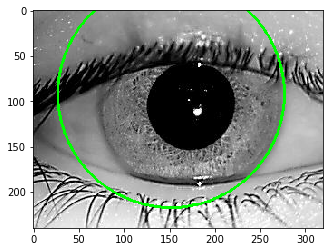

In [26]:
plt.imshow(irises[8])